In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure,xticks
%matplotlib inline

DATA_DIR = '.'

# Load Data

In [2]:
data = pd.DataFrame()

In [3]:
data = pd.concat([
     pd.read_csv('{}/final_trip_advisor_yelp_mBERT_result_combined_1.csv'.format(DATA_DIR)),
     pd.read_csv('{}/final_trip_advisor_yelp_mBERT_result_combined_2.csv'.format(DATA_DIR))
    ])
data = data.sort_values(by=['total_data', 'foreign_mult', 'seed'])
print(data.shape)
data.head(10)

(576, 8)


,type,total_data,seed,foreign_mult,total_foreign_data,f1,recall,precision
0,B,500,1,-1.0,500,0.480727,0.631111,0.459845
1,B,500,2,-1.0,500,0.457980,0.669333,0.451439
2,B,500,3,-1.0,500,0.472562,0.642667,0.456151
0,B,500,4,-1.0,500,0.484269,0.598222,0.458447
1,B,500,5,-1.0,500,0.479491,0.608889,0.456362
2,B,500,6,-1.0,500,0.318254,1.000000,0.463535
3,A,500,1,0.0,0,0.469326,0.638222,0.453569
4,A,500,2,0.0,0,0.317400,1.000000,0.463344
5,A,500,3,0.0,0,0.466893,0.654222,0.454321
3,A,500,4,0.0,0,0.483589,0.601778,0.458362


In [4]:
data = data.groupby(['total_data', 'foreign_mult']).mean().reset_index()

# Plot F1 By Total Data for each Type

In [5]:
data = data.sort_values(by=['total_data', 'foreign_mult'])
print(data.shape)
data.head(20)

(96, 7)


,total_data,foreign_mult,seed,total_foreign_data,f1,recall,precision
0,500,-1.00,3.5,500.0,0.448881,0.691704,0.457630
1,500,0.00,3.5,0.0,0.421759,0.755259,0.458417
2,500,0.25,3.5,125.0,0.424589,0.752593,0.458810
3,500,0.50,3.5,250.0,0.467379,0.646370,0.454857
4,500,0.75,3.5,375.0,0.469359,0.642222,0.454814
5,500,1.00,3.5,500.0,0.473925,0.637333,0.457026
6,500,1.50,3.5,750.0,0.472347,0.636741,0.455489
7,500,2.00,3.5,1000.0,0.474149,0.640148,0.457338
8,500,3.00,3.5,1500.0,0.472155,0.652000,0.457237
9,500,4.00,3.5,2000.0,0.471262,0.661630,0.458012


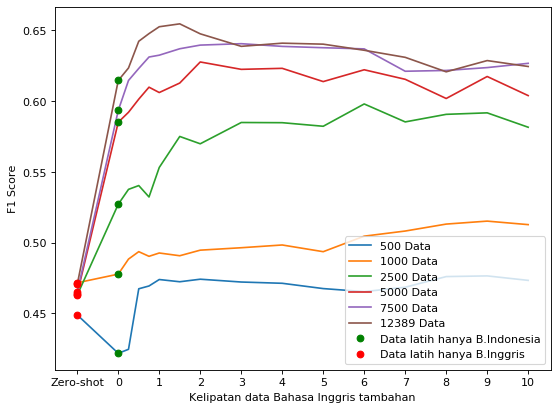

In [6]:
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

total_data = [500, 1000, 2500, 5000, 7500, 12389]

for x in total_data:
     plt.plot(data[(data['total_data'] == x )].foreign_mult.values,
        data[(data['total_data'] == x)].f1.values,
        
        label='{} Data'.format(x))
    
plt.plot(data[(data['foreign_mult'] == 0 )].foreign_mult.values,
data[(data['foreign_mult'] == 0)].f1.values,
'go',
label='Data latih hanya B.Indonesia'.format(x))

plt.plot(data[(data['foreign_mult'] == -1)].foreign_mult.values,
data[(data['foreign_mult'] == -1)].f1.values,
'ro',
label='Data latih hanya B.Inggris'.format(x))

xticks([-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], ['Zero-shot', 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

plt.legend(loc="lower right")
plt.xlabel('Kelipatan data Bahasa Inggris tambahan')
plt.ylabel('F1 Score')
plt.title('')
plt.savefig('plot.png')
plt.show()

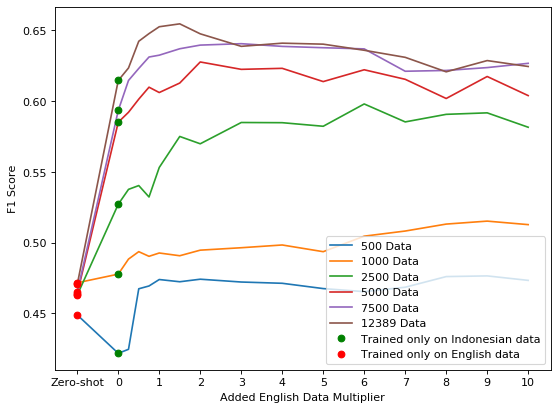

In [8]:
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

total_data = [500, 1000, 2500, 5000, 7500, 12389]

for x in total_data:
     plt.plot(data[(data['total_data'] == x )].foreign_mult.values,
        data[(data['total_data'] == x)].f1.values,
        
        label='{} Data'.format(x))
    
plt.plot(data[(data['foreign_mult'] == 0 )].foreign_mult.values,
data[(data['foreign_mult'] == 0)].f1.values,
'go',
label='Trained only on Indonesian data'.format(x))

plt.plot(data[(data['foreign_mult'] == -1)].foreign_mult.values,
data[(data['foreign_mult'] == -1)].f1.values,
'ro',
label='Trained only on English data'.format(x))

xticks([-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], ['Zero-shot', 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

plt.legend(loc="lower right")
plt.xlabel('Added English Data Multiplier')
plt.ylabel('F1 Score')
plt.title('')
plt.savefig('plot-trip-mbert-english.png',bbox_inches='tight', transparent="True", pad_inches=0)
plt.show()

In [6]:
total_data = [500, 1000, 2500, 5000, 7500, 12389]
diff = 0
for x in total_data:
    cur_diff = data[(data['total_data'] == x) & (data['foreign_mult'] == 0)].f1.values[0] - data[(data['total_data'] == x) & (data['foreign_mult'] == -1)].f1.values[0]
    print("Data {} diff: {}".format(x, cur_diff))
    diff += cur_diff
    
print(diff)
print("Avg: ", diff/len(total_data))

Data 500 diff: -0.02712131601641904
Data 1000 diff: 0.006118821461018942
Data 2500 diff: 0.06421242017265799
Data 5000 diff: 0.12114631938485959
Data 7500 diff: 0.1284332003209387
Data 12389 diff: 0.14411084197754087
0.43690028730059705
Avg:  0.07281671455009951


In [7]:
total_data = [500, 1000, 2500, 5000, 7500, 12389]
gains = 0
gains_list = []
for x in total_data:
    cur_gains = max(data[(data['total_data'] == x)].f1.values) - data[(data['total_data'] == x) & (data['foreign_mult'] == 0)].f1.values[0]
    gains += cur_gains
    print("Data {} diff: {}".format(x, cur_gains))
    gains_list.append(cur_gains)
    
print(gains)
print("Avg: ", gains/len(total_data))

Data 500 diff: 0.054725011315118754
Data 1000 diff: 0.037481664179051466
Data 2500 diff: 0.07089631895925208
Data 5000 diff: 0.04259760791340961
Data 7500 diff: 0.047192595689128924
Data 12389 diff: 0.04003840467405828
0.2929316027300191
Avg:  0.04882193378833652


In [8]:
total_data[5] = 10000
df_gains = pd.DataFrame()
df_gains['data'] = total_data
df_gains['gain'] = gains_list
df_gains.to_csv('gains.csv', index=False)
df_gains.head(10)

,data,gain
0,500,0.054725
1,1000,0.037482
2,2500,0.070896
3,5000,0.042598
4,7500,0.047193
5,10000,0.040038


In [9]:
data[(data['total_data'] == 12389)]

,total_data,foreign_mult,seed,total_foreign_data,f1,recall,precision
80,12389,-1.00,3.5,12389.0,0.470539,0.698074,0.462500
81,12389,0.00,3.5,0.0,0.614649,0.659111,0.572966
82,12389,0.25,3.5,3097.0,0.623484,0.657333,0.583124
83,12389,0.50,3.5,6194.0,0.642377,0.683407,0.600091
84,12389,0.75,3.5,9291.0,0.647791,0.689481,0.605102
85,12389,1.00,3.5,12389.0,0.652647,0.690074,0.610723
86,12389,1.50,3.5,18583.0,0.654688,0.704000,0.610265
87,12389,2.00,3.5,24778.0,0.647636,0.701630,0.602798
88,12389,3.00,3.5,37167.0,0.638786,0.703852,0.592725
89,12389,4.00,3.5,49556.0,0.641030,0.707259,0.594726
